In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
df=pd.read_csv("/content/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding="latin-1", sep =';')

In [5]:
feats= ['1']

In [6]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X=transformer.fit_transform(np.array(df[feats]).reshape(-1,1))


In [7]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [8]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [9]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.000151726

[400]	valid_0's multi_logloss: 0.000151726

[200]	valid_0's multi_logloss: 0.000153686

[400]	valid_0's multi_logloss: 0.000153686

[200]	valid_0's multi_logloss: 0.000155722

[400]	valid_0's multi_logloss: 0.000155722

[200]	valid_0's multi_logloss: 0.000156754

[400]	valid_0's multi_logloss: 0.000156754

[200]	valid_0's multi_logloss: 0.000153261

[400]	valid_0's multi_logloss: 0.000153261

[200]	valid_0's multi_logloss: 0.00015524

[400]	valid_0's multi_logloss: 0.00015524

[200]	valid_0's multi_logloss: 0.000155472

[400]	valid_0's multi_logloss: 0.000155472

[200]	valid_0's multi_logloss: 9.92419e-06

[400]	valid_0's multi_logloss: 9.8222e-06

[600]	valid_0's multi_logloss: 9.75475e-06

[800]	valid_0's multi_logloss: 9.70667e-06

[1000]	valid_0's multi_logloss: 9.67072e-06

[1200]	valid_0's multi_logloss: 9.64285e-06

[1400]	valid_0's multi_logloss: 9.62062e-06

[1600]	valid_0's multi_logloss: 9.60248e-06

[1800]	valid_0's multi_logloss:

In [10]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [11]:
labels=np.argmax(lgb_preds,axis=1)

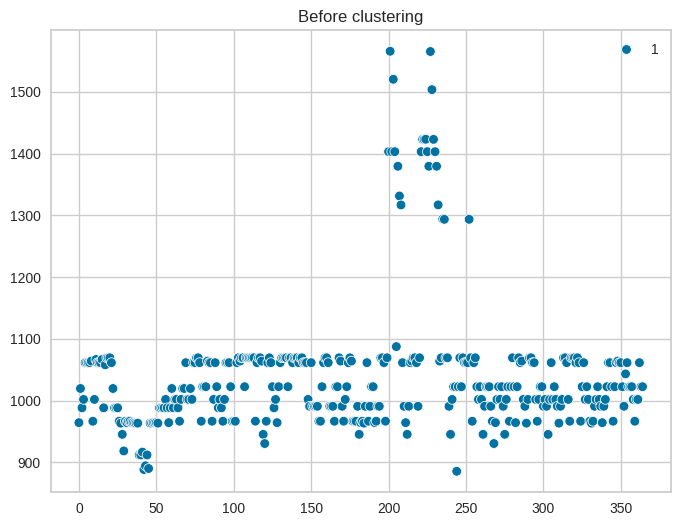

In [12]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df[feats], marker='o');
ax.set_title("Before clustering");

ValueError: 0      0
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    2
363    0
364    0
Name: Clusters, Length: 365, dtype: int64 is not a valid value for color

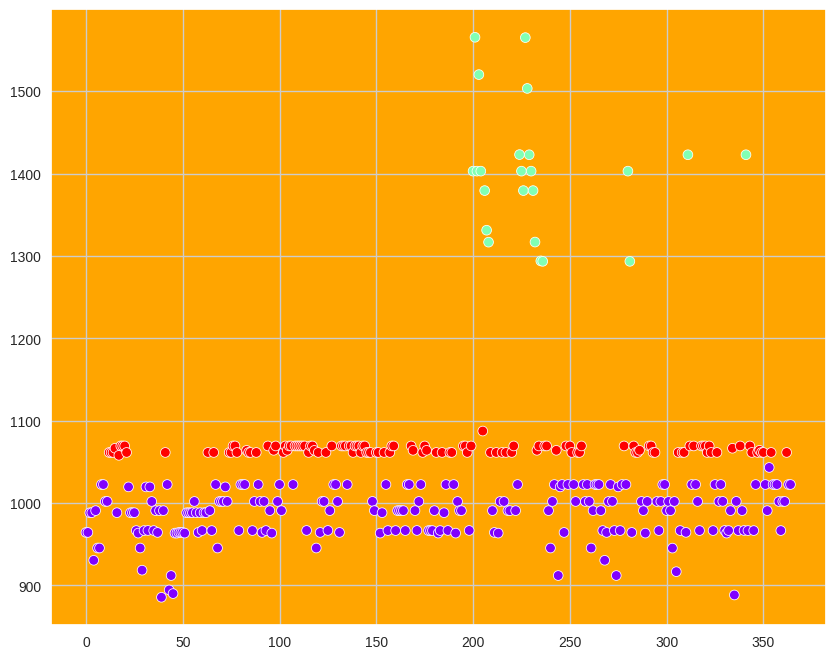

In [50]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(df[feats], c=df["Clusters"], marker='o',cmap="rainbow");
ax.set_title("After Clustering");

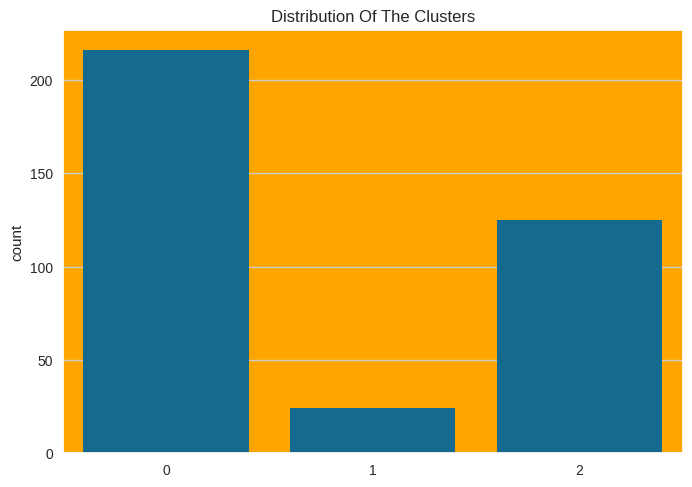

In [20]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

In [21]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.layers import RNN

In [23]:
df['Ngay'] = pd.to_datetime(df['Ngay'], format='%d/%m/%Y')
df.sort_values(by='Ngay', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
test_size = df[df['Ngay'].dt.month==12].shape[0]
test_size

31

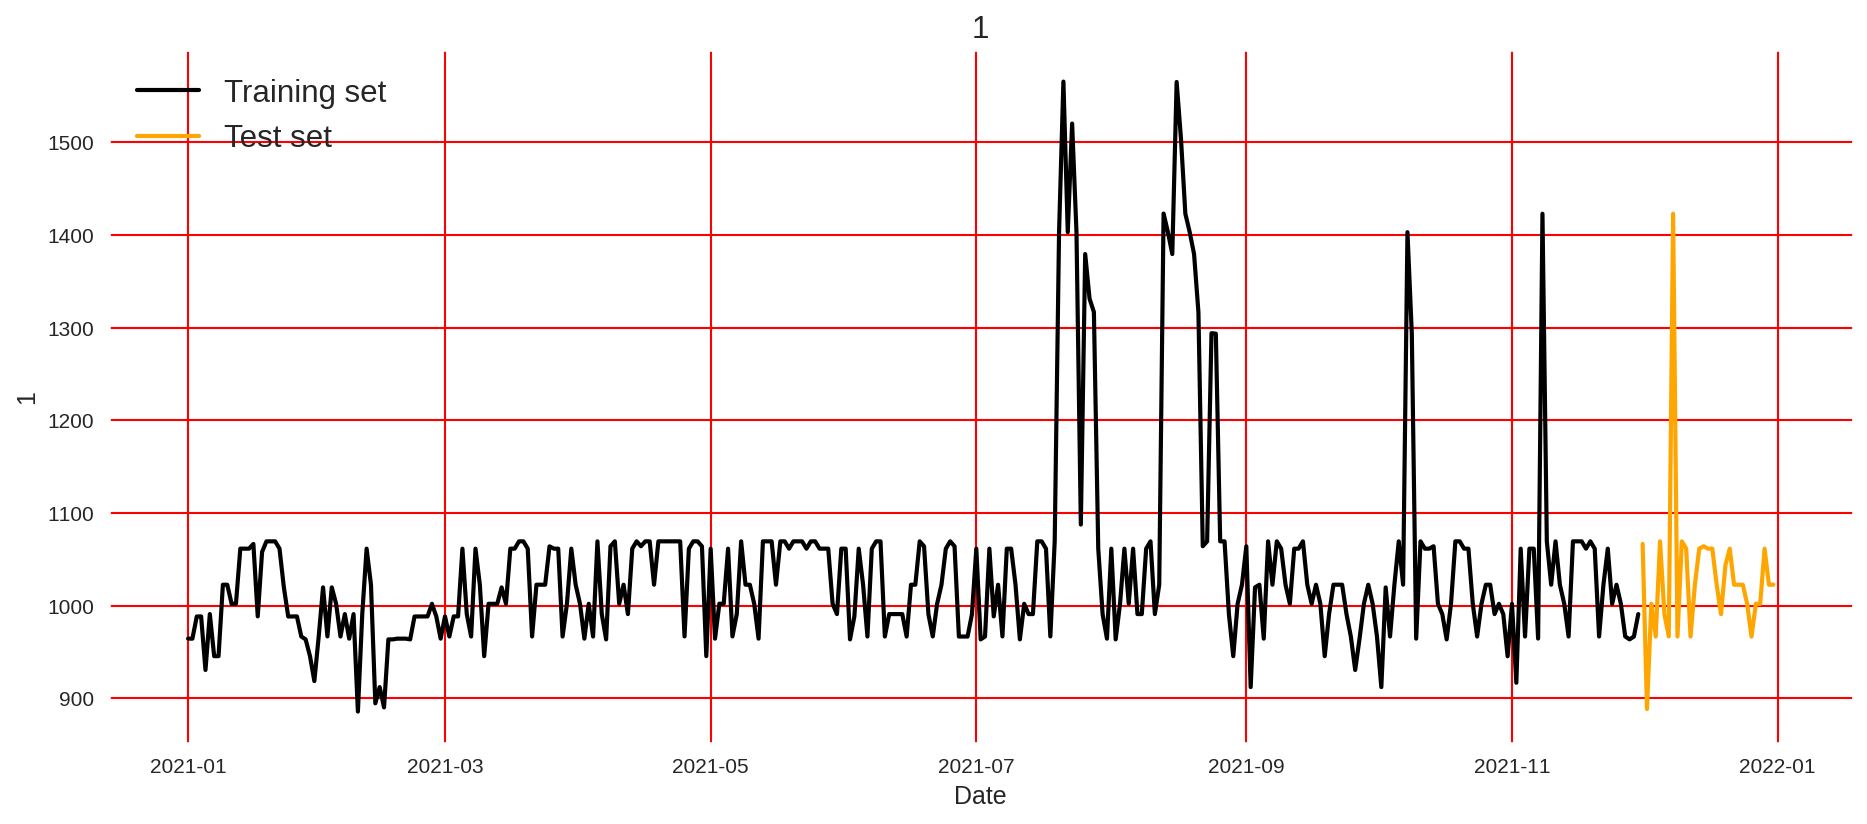

In [57]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngay'][:-test_size], df['1'][:-test_size], color='black', lw=2)
plt.plot(df['Ngay'][-test_size:], df['1'][-test_size:], color='orange', lw=2)
plt.title('1', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='red')
plt.show()

In [61]:
import plotly.express as px
fig = px.line(y=df['1'], x=df['Ngay'])
fig.update_traces(line_color='red')
fig.update_layout(xaxis_title="Ngay",
                  yaxis_title="1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df['1'].values.reshape(-1,1))

MinMaxScaler()

In [31]:
window_size = 15

In [32]:
train_data = df['1'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [33]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [34]:
test_data = df['1'][-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [35]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

In [36]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [38]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model
model = define_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

In [39]:
model = define_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Model: "model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 15, 1)]           0         

                                                                 

 lstm (LSTM)                 (None, 64)                16896     

                                                                 

 dense (Dense)               (None, 32)                2080      

                                                                 

 dense_1 (Dense)             (None, 1)                 33        

                                                                 


Total params: 19009 (74.25 KB)

Trainable params: 19009 (74.25 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________

Epoch 1/100

18/18 [==============================] - 4s 39ms/step - loss: 0.0633 - val_loss: 0.0200

Epoch 2/100

18/18 [==================

In [40]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 475ms/step - loss: 0.0223

1/1 [==============================] - 0s 426ms/step


In [41]:
from sklearn.metrics import mean_absolute_percentage_error,accuracy_score,r2_score
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1-MAPE

In [45]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.02227168157696724

Test MAPE: 1.8620109103995033

Test Accuracy: -0.8620109103995033


In [46]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

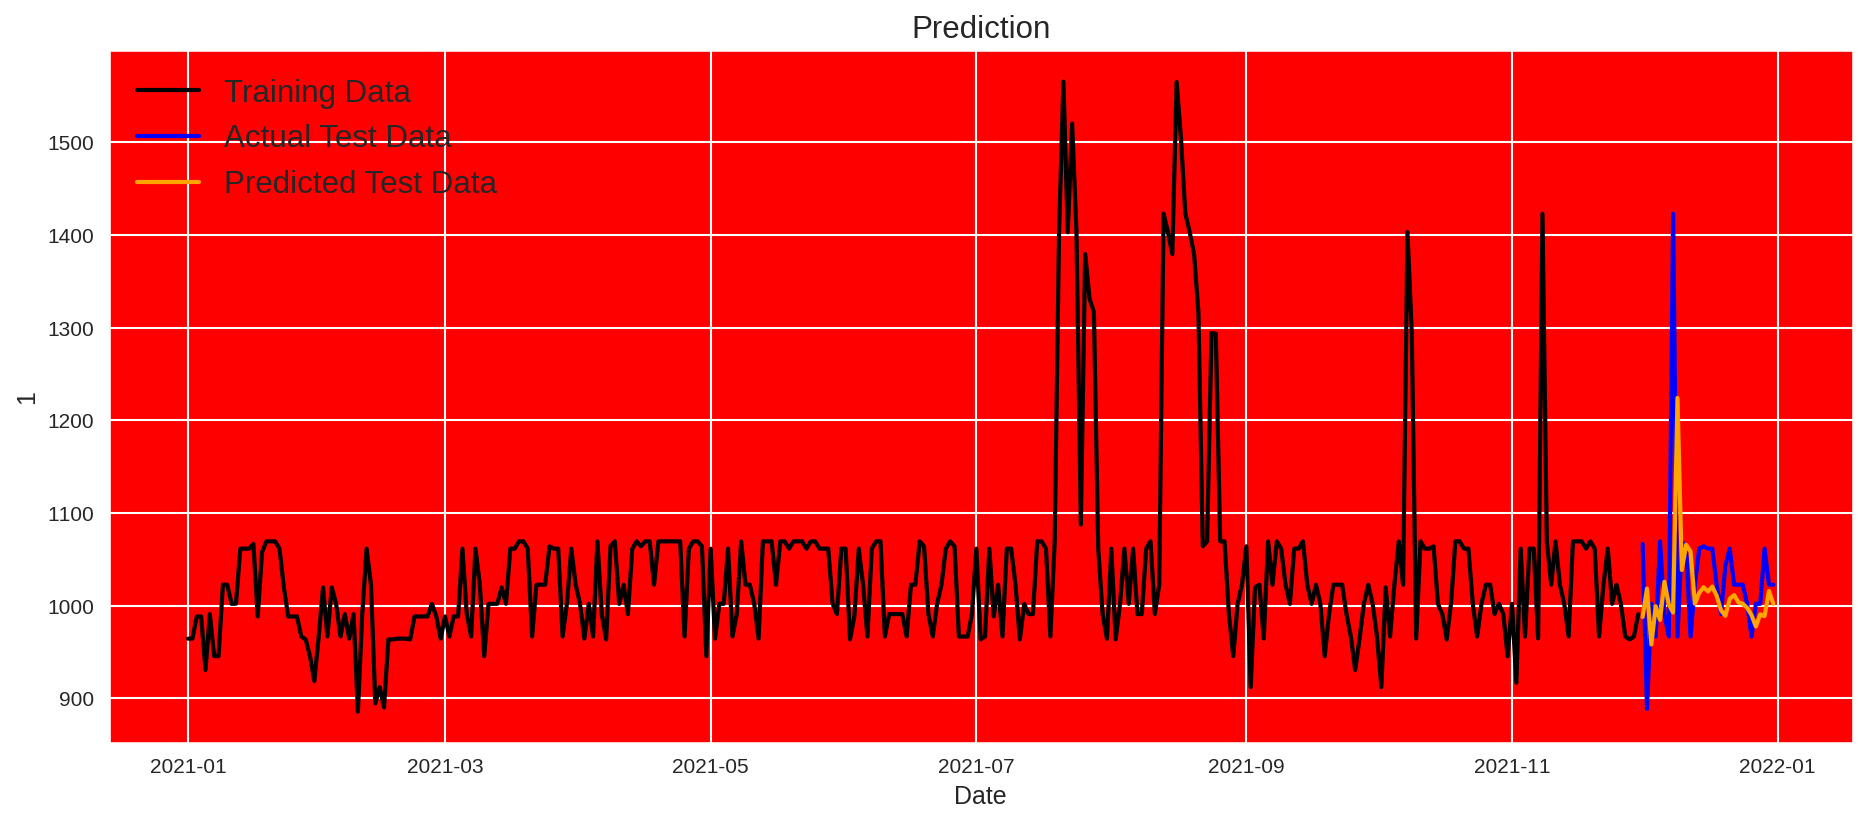

In [63]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'red'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngay'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngay'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Ngay'].iloc[-test_size:], y_test_pred, color='orange', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [54]:
model = define_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

NameError: name 'RNN' is not defined